In [1]:
import metpy
import xarray as xr

from datetime import datetime
from siphon.catalog import TDSCatalog
from xarray.backends import NetCDF4DataStore
from metpy.plots import ContourPlot, MapPanel, PanelContainer
from metpy.units import units

In [2]:
catalog = TDSCatalog('https://thredds-dev.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.xml')

In [3]:
catalog.datasets

['Full Collection (Reference / Forecast Time) Dataset', 'Best GFS Half Degree Forecast Time Series', 'Latest Collection for GFS Half Degree Forecast']

In [4]:
ncss = catalog.datasets['Best GFS Half Degree Forecast Time Series'].subset()

In [5]:
query = ncss.query()
query.time(datetime(2023, 2, 4))
query.accept('netcdf')
query.variables('Geopotential_height_isobaric',
               'u-component_of_wind_isobaric',
               'v-component_of_wind_isobaric')
query.add_lonlat()


var=Geopotential_height_isobaric&var=u-component_of_wind_isobaric&var=v-component_of_wind_isobaric&time=2023-02-04T00%3A00%3A00&accept=netcdf&addLatLon=True

In [6]:
ds = ncss.get_data(query)

In [7]:
ds = xr.open_dataset(NetCDF4DataStore(ds)).metpy.parse_cf()

In [8]:
ds

<xarray.Dataset>
Dimensions:                         (time1: 1, latitude: 361, isobaric: 41,
                                     longitude: 720)
Coordinates:
  * time1                           (time1) datetime64[ns] 2023-02-04
  * latitude                        (latitude) float32 90.0 89.5 ... -89.5 -90.0
    reftime1                        (time1) datetime64[ns] 2023-02-04
  * isobaric                        (isobaric) float64 1.0 2.0 ... 1e+05
  * longitude                       (longitude) float32 0.0 0.5 ... 359.0 359.5
    metpy_crs                       object Projection: latitude_longitude
Data variables:
    u-component_of_wind_isobaric    (time1, isobaric, latitude, longitude) float32 ...
    v-component_of_wind_isobaric    (time1, isobaric, latitude, longitude) float32 ...
    Geopotential_height_isobaric    (time1, isobaric, latitude, longitude) float32 ...
    LatLon_361X720-0p25S-180p00E-2  int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [13]:
contour = ContourPlot()
contour.data = ds
contour.field = 'Geopotential_height_isobaric'
contour.level = 850 * units.Pa
contour.linecolor = 'black'
contour.contours = 30

In [15]:
panel = MapPanel()
panel.area = (-60,-30,-35,-10)
panel.layers = ['coastline', 'borders', 'states']
panel.title = 'GFS Map'
panel.plots = [contour]

/home/isabela/anaconda3/envs/eda_analytics/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/isabela/anaconda3/envs/eda_analytics/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/isabela/anaconda3/envs/eda_analytics/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


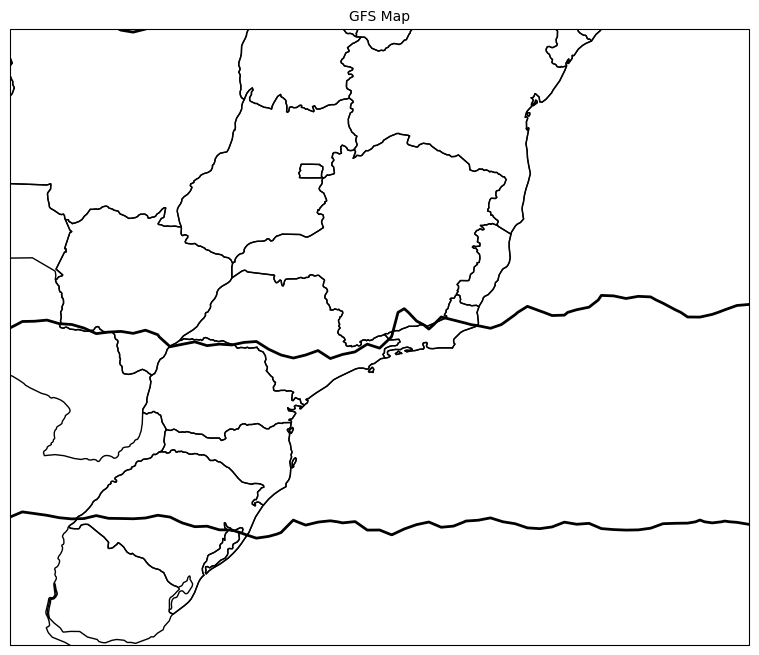

In [16]:
pc = PanelContainer()
pc.size = (10, 8)
pc.panels = [panel]
pc.show()